# ANÁLISIS DE LA PRIMERA EVALUACIÓN
## IES Puerto de la Cruz - Telesforo Bravo | Curso 2017-2018

In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML

In [57]:
df = pd.read_excel("data_2017.xlsx", index_col=0, sheet_name="EVAL1")
df.head()

,etapa,éxito,absentismo,partes,suspensión_asistencia,ratio
grupo,,,,,,
ESO1A,ESO,32.0,8.66,2.0,NaN,25
ESO1B,ESO,43.5,6.13,NaN,NaN,22
ESO1C,ESO,44.0,4.82,3.0,NaN,25
ESO1D,ESO,46.2,2.94,3.0,NaN,27
ESO2A,ESO,24.1,5.95,10.0,3.0,29


In [58]:
def get_data_by_stages(stages):
    if not isinstance(stages, list):
        stages = [stages]
    return df[df["etapa"].isin(stages)]

In [59]:
def draw_academic_rate(df, fontsize=20, value_margin=3):
    plt.figure(figsize=(30, 10), dpi=96)
    sns.barplot(df.index, df["éxito"])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=fontsize)
    ax = plt.gca()
    # show rate percentage on bars
    for i, value in enumerate(df["éxito"]):
        ax.text(i, value - value_margin,
                f"{value:,.0f}%", ha="center", fontsize=fontsize, color="w")
    # hide chart frame
    for spine in ax.spines.values():
        spine.set_visible(False)
    # hide ticks
    plt.tick_params(top="off", bottom="off", left="off",
                    right="off", labelleft="off", labelbottom="on")

# ESO + FPB

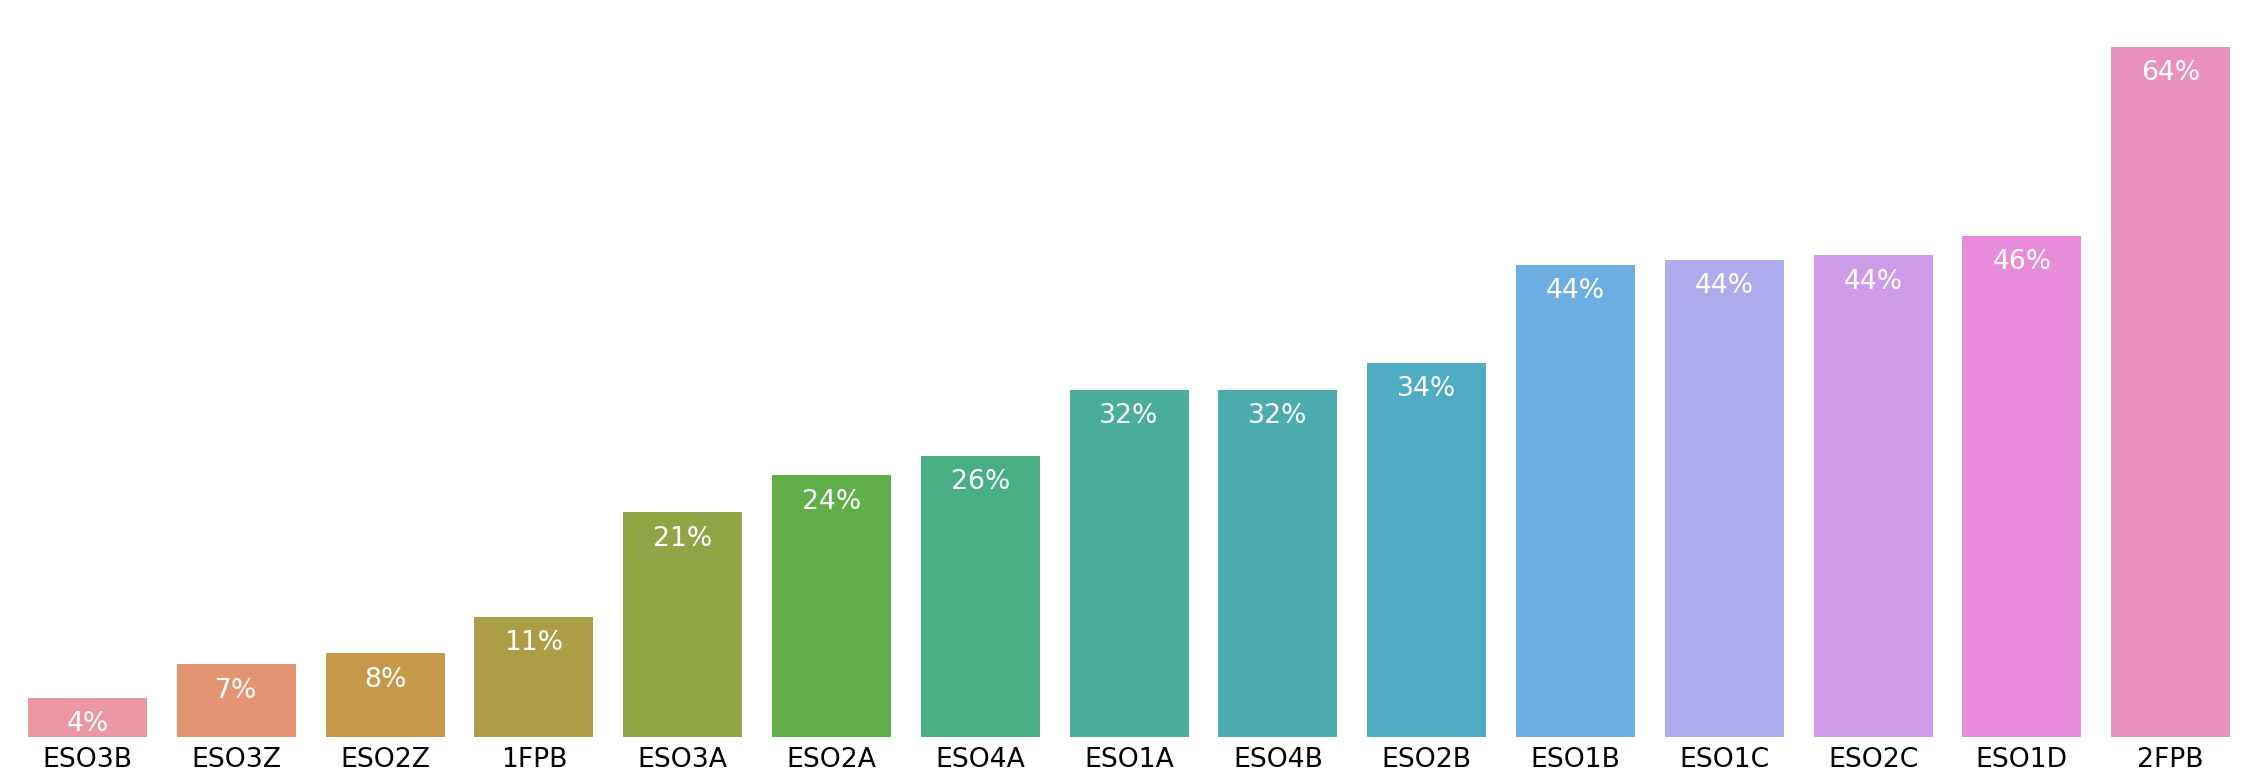

In [61]:
df_ESOFPB = get_data_by_stages(["ESO", "FPB"])
draw_academic_rate(df_ESOFPB.sort_values("éxito"))

In [62]:
df_ESOFPB.mean()

éxito                    29.333333
absentismo                9.776000
partes                    7.363636
suspensión_asistencia     4.000000
ratio                    22.400000
dtype: float64

# BACHILLERATO

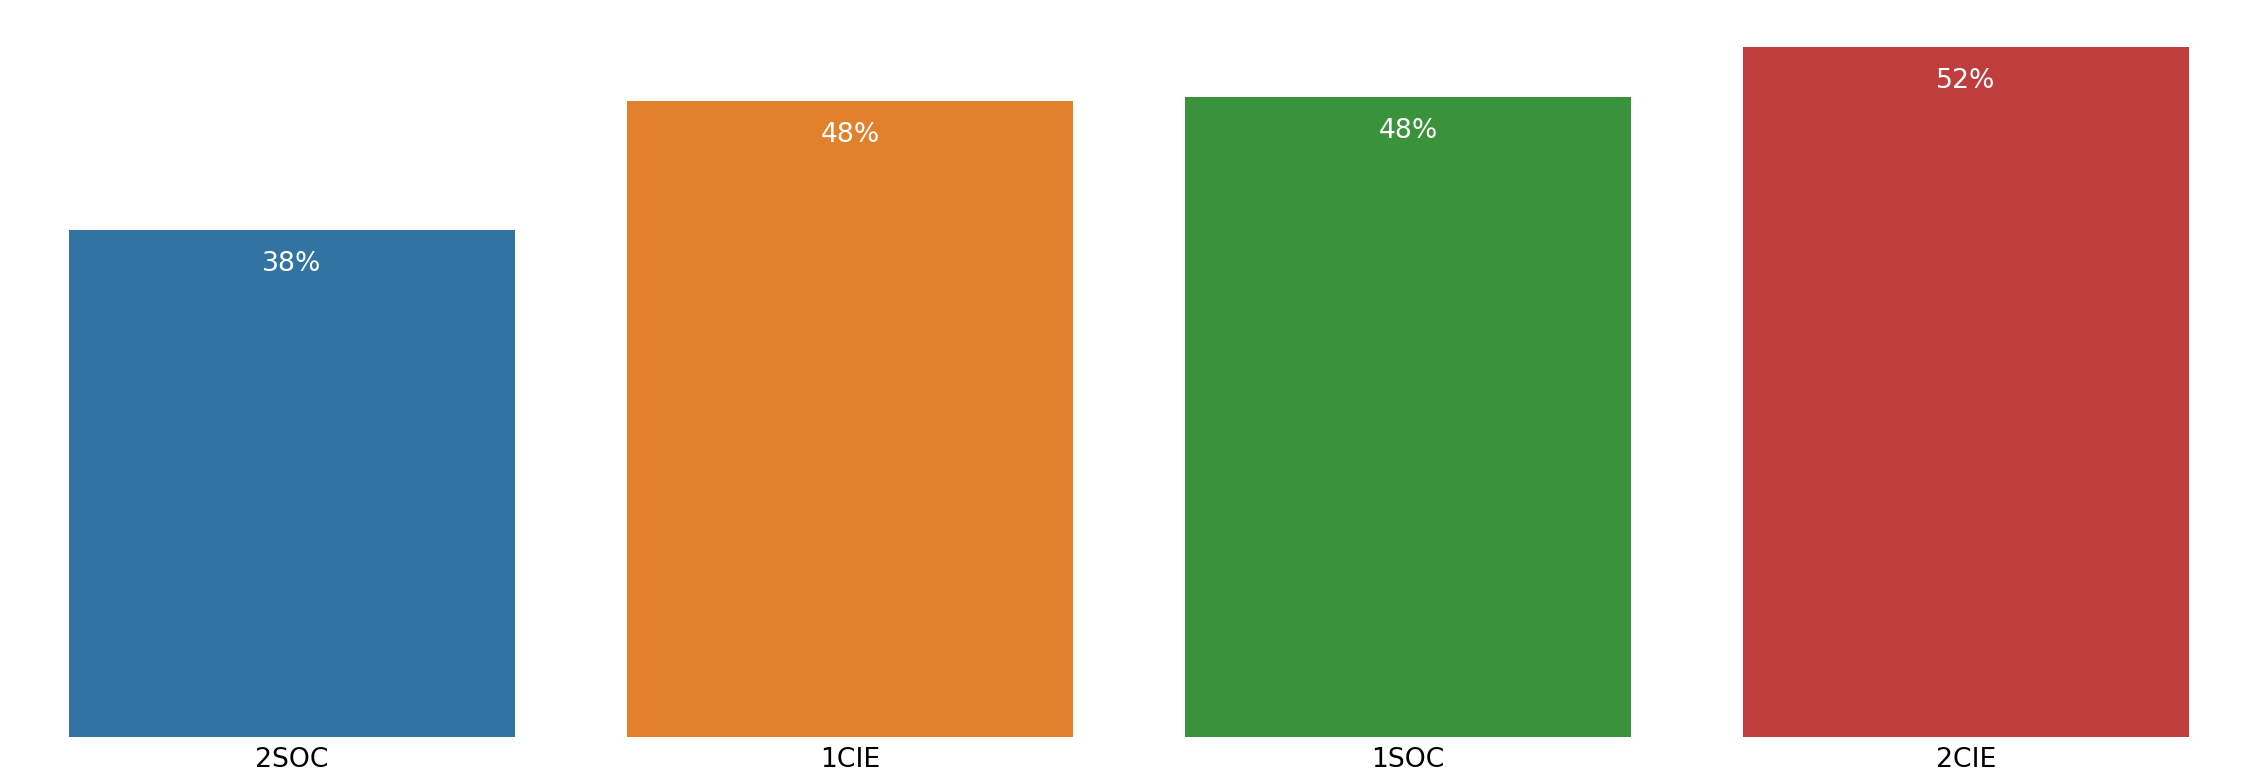

In [63]:
df_BACH = get_data_by_stages("BACH")
draw_academic_rate(df_BACH.sort_values("éxito"))

In [64]:
df_BACH.mean()

éxito                    46.4750
absentismo                4.5025
partes                    1.0000
suspensión_asistencia        NaN
ratio                    24.2500
dtype: float64

# CICLOS FORMATIVOS DE GRADO MEDIO

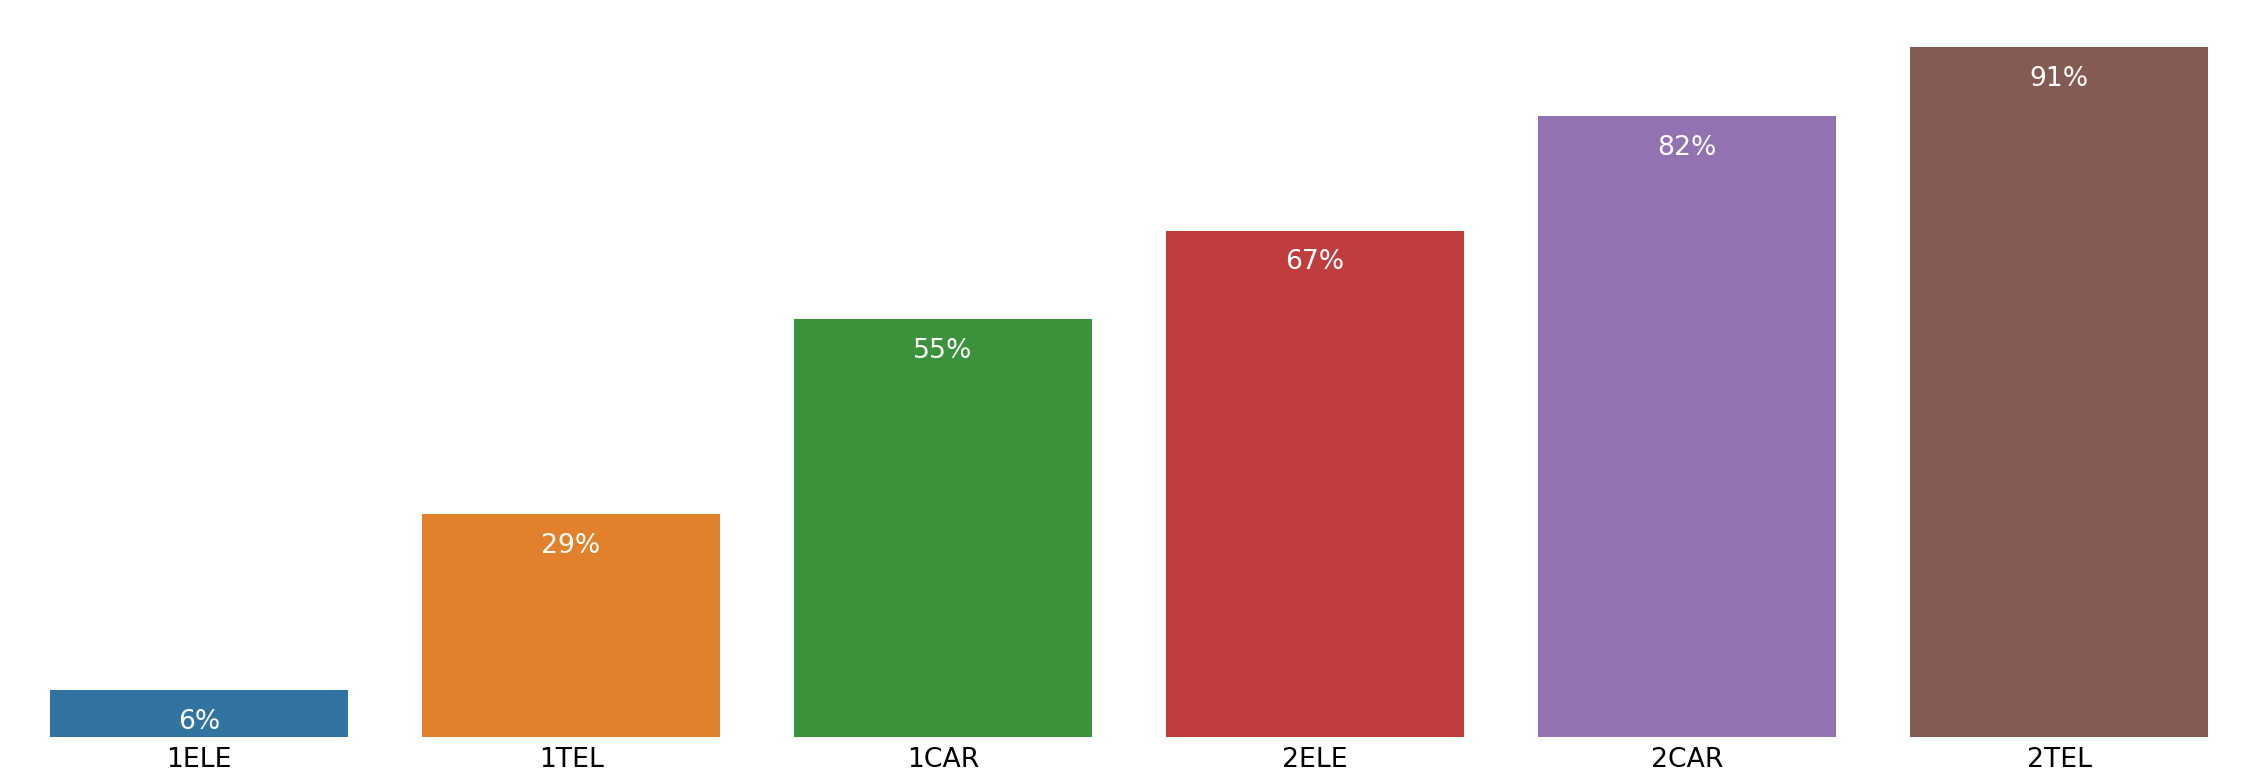

In [65]:
df_CFGM = get_data_by_stages("CFGM")
draw_academic_rate(df_CFGM.sort_values("éxito"), value_margin=5)

In [66]:
df_CFGM.mean()

éxito                    55.000000
absentismo               14.743333
partes                    1.500000
suspensión_asistencia     1.000000
ratio                    13.666667
dtype: float64

# CICLOS FORMATIVOS DE GRADO SUPERIOR

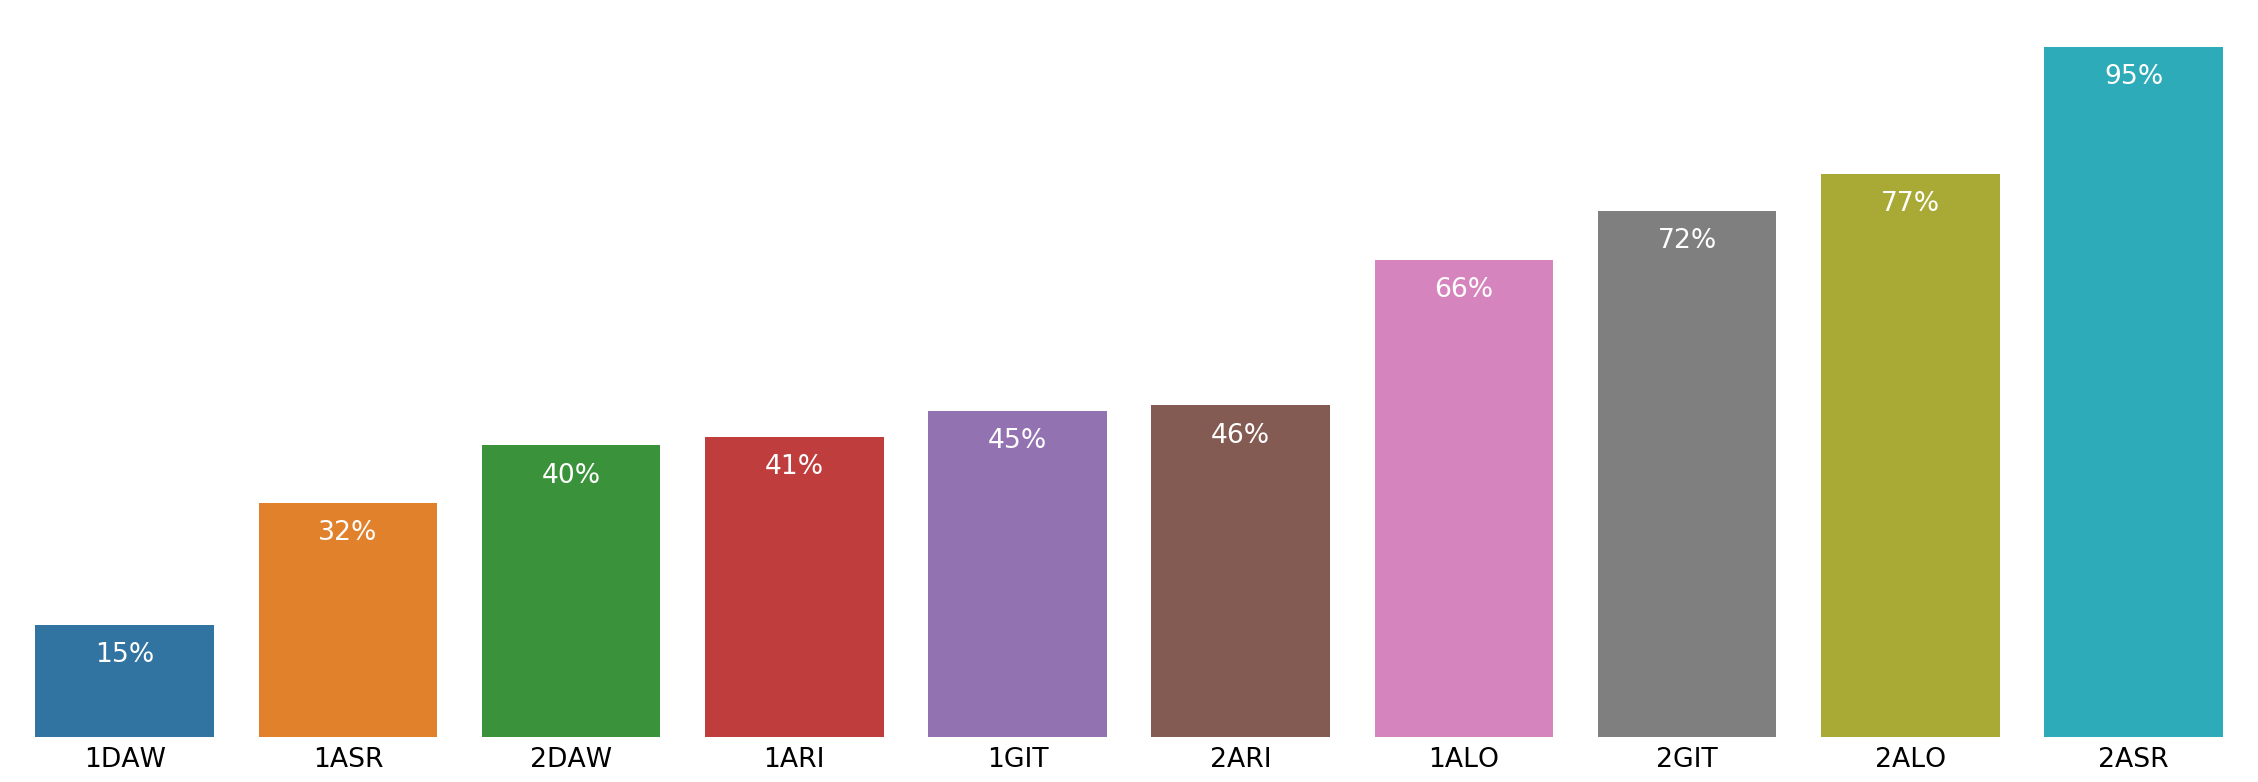

In [67]:
df_CFGS = get_data_by_stages("CFGS")
draw_academic_rate(df_CFGS.sort_values("éxito"), value_margin=5)

In [68]:
df_CFGS.mean()

éxito                    52.870
absentismo               12.903
partes                    1.000
suspensión_asistencia     1.000
ratio                    21.600
dtype: float64

# TODOS LOS GRUPOS

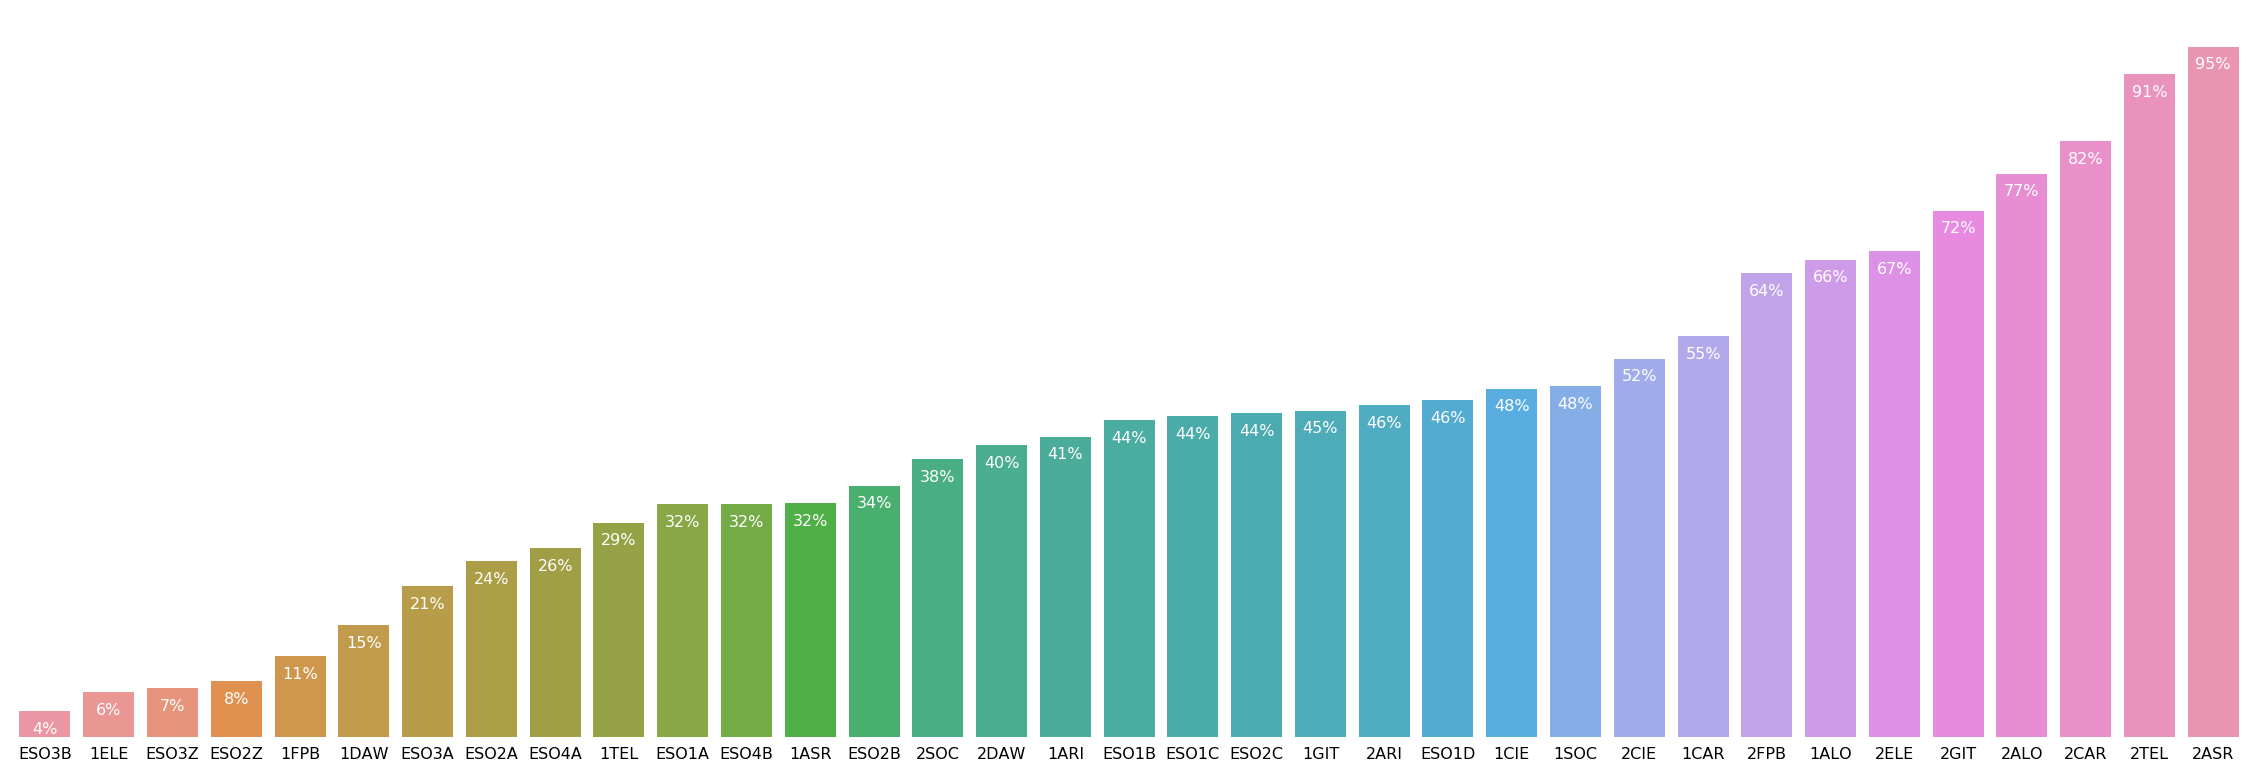

In [69]:
draw_academic_rate(df.sort_values("éxito"), 12)

# POR ENSEÑANZAS

In [70]:
mean_success = df["éxito"].mean()
display(HTML(f"<h2>Rendimiento global medio: {mean_success:.2f}%</h2>"))

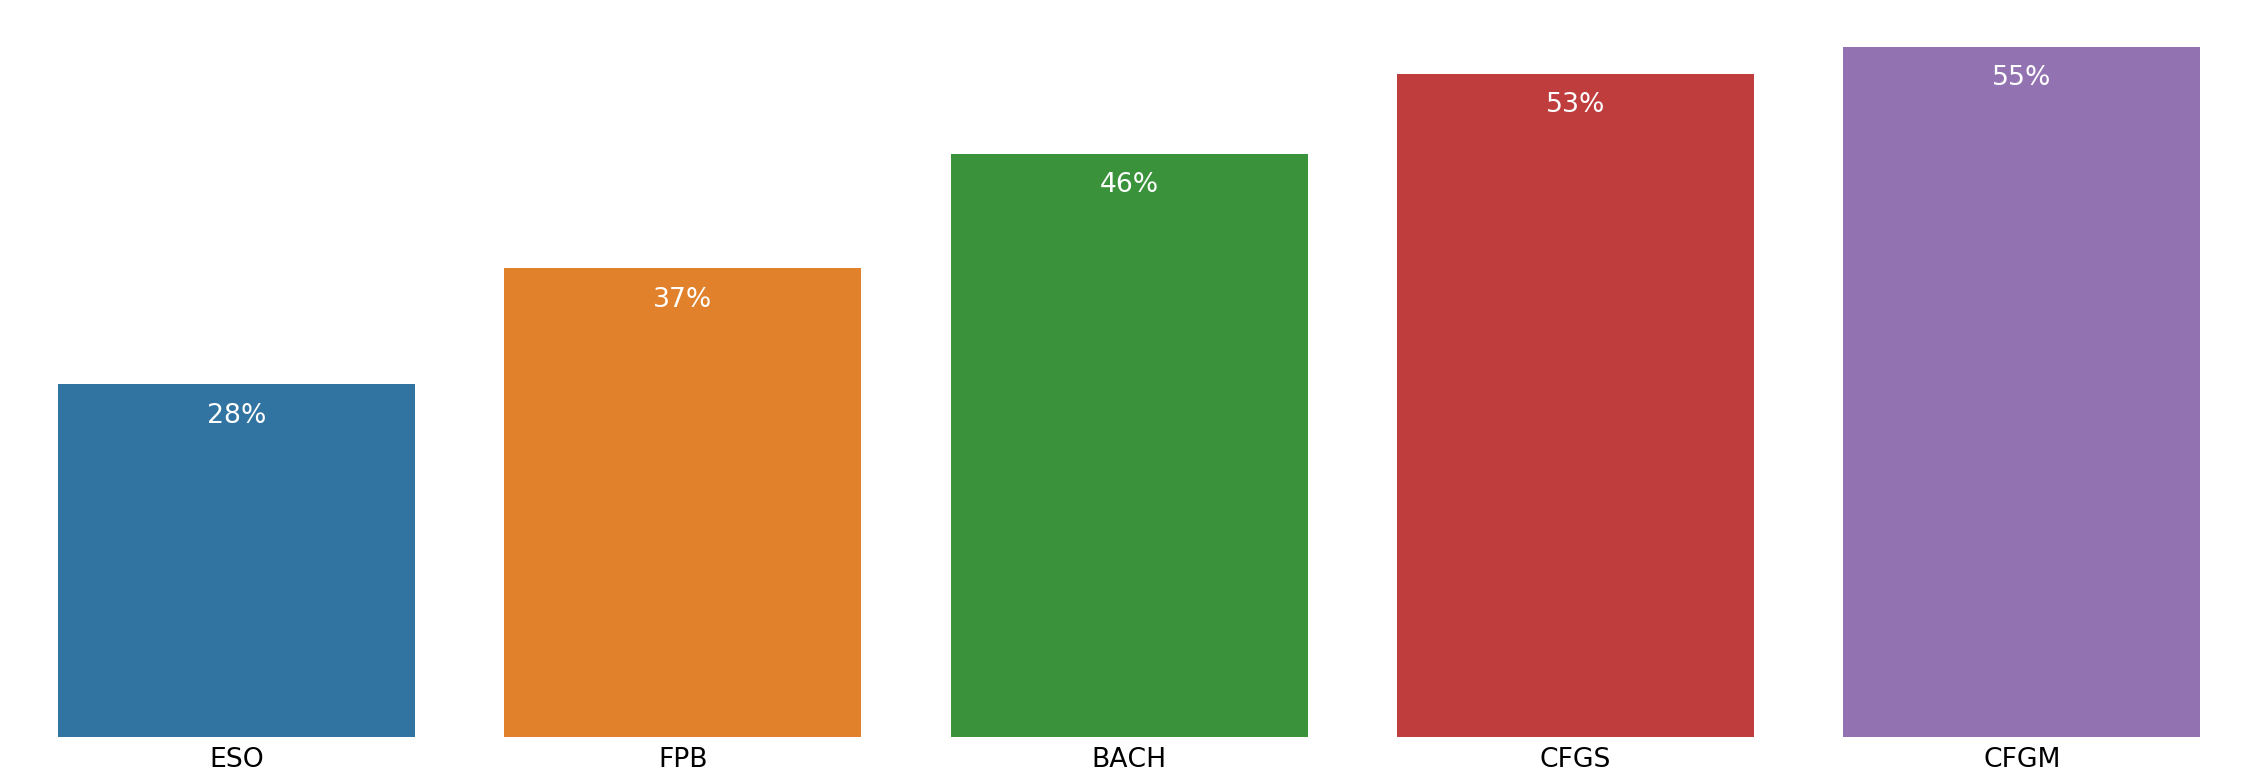

In [71]:
df_summary = df.groupby("etapa").mean()
draw_academic_rate(df_summary.sort_values("éxito"))

# RELACIÓN `ratio-éxito`

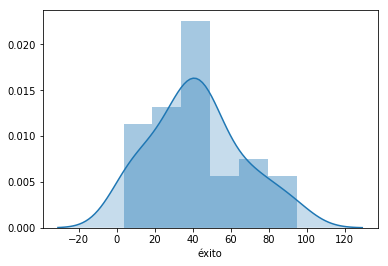

In [72]:
sns.distplot(df["éxito"], kde_kws={"shade": True});

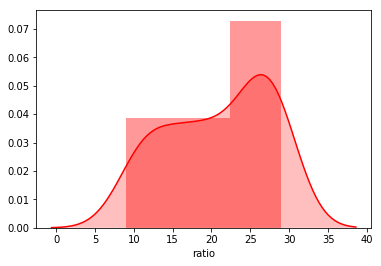

In [73]:
sns.distplot(df["ratio"], kde_kws={"shade": True}, color="red");

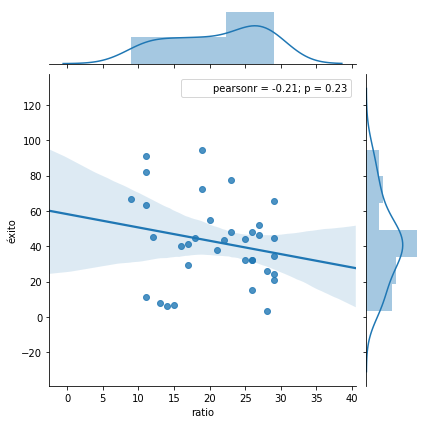

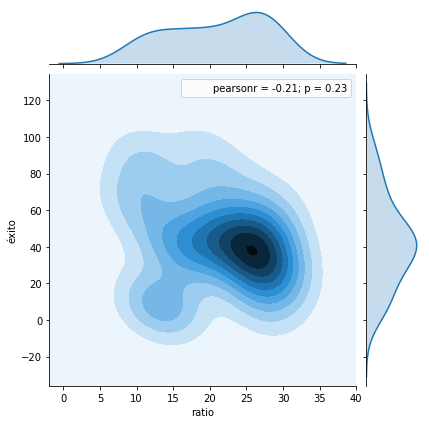

In [74]:
sns.jointplot("ratio", "éxito", df, kind="reg");
sns.jointplot("ratio", "éxito", df, kind="kde");

In [75]:
df[(df["éxito"] > 0) & (df["éxito"] < 20)
    & (df["ratio"] > 10) & (df["ratio"] < 20)]

,etapa,éxito,absentismo,partes,suspensión_asistencia,ratio
grupo,,,,,,
ESO2Z,ESO,7.7,9.47,4.0,NaN,13
ESO3Z,ESO,6.7,19.07,15.0,NaN,15
1FPB,FPB,11.1,43.49,16.0,6.0,11
1ELE,CFGM,6.2,21.02,NaN,NaN,14


# Análisis de Grupos

In [76]:
df["rate"] = df["éxito"] * df["ratio"]

## Mejor relación `ratio-éxito`

In [77]:
df.sort_values("rate", ascending=False).head(5)

,etapa,éxito,absentismo,partes,suspensión_asistencia,ratio,rate
grupo,,,,,,,
1ALO,CFGS,65.5,14.61,1.0,1.0,29,1899.5
2ASR,CFGS,94.7,5.01,NaN,NaN,19,1799.3
2ALO,CFGS,77.3,10.27,NaN,NaN,23,1777.9
2CIE,BACH,51.9,5.03,NaN,NaN,27,1401.3
2GIT,CFGS,72.2,17.50,NaN,NaN,19,1371.8


## Peor relación `ratio-éxito`

In [78]:
df.sort_values("rate", ascending=False).tail(5)

,etapa,éxito,absentismo,partes,suspensión_asistencia,ratio,rate
grupo,,,,,,,
1FPB,FPB,11.1,43.49,16.0,6.0,11,122.1
ESO3B,ESO,3.6,7.19,8.0,NaN,28,100.8
ESO3Z,ESO,6.7,19.07,15.0,NaN,15,100.5
ESO2Z,ESO,7.7,9.47,4.0,NaN,13,100.1
1ELE,CFGM,6.2,21.02,NaN,NaN,14,86.8
